# Causal Inference: Gun Reform and Lethal Violence - a Difference-in-Difference Analysis
An updated analysis of Cheng and Hoekstra [2013] review of changes to the Castle Doctrine and resulting changes to lethal violence.

## Analysis

### Import Libraries

In [ ]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p

### Load Data

In [ ]:
# Accessing Google Drive by mounting it locally
from google.colab import drive
drive.mount('/content/drive')

# Location on Google Drive
loc_data = '/content/drive/MyDrive/colab_notebooks/GitHub/causal_inference_castle_doctrine/data/'

# Load Stata datafile into pandas
castle = pd.read_stata(loc_data + 'castle.dta')

# Unmount Google Drive.
drive.flush_and_unmount()

Mounted at /content/drive


In [ ]:
# 
crime1 = ("jhcitizen_c", "jhpolice_c", 
            "murder", "homicide", 
            "robbery", "assault", "burglary",
            "larceny", "motor", "robbery_gun_r")
demo = ("emo", "blackm_15_24", "whitem_15_24", 
          "blackm_25_44", "whitem_25_44")

# variables dropped to prevent colinearity
dropped_vars = ("r20004", "r20014",
                  "r20024", "r20034",
                  "r20044", "r20054",
                  "r20064", "r20074",
                  "r20084", "r20094",
                  "r20101", "r20102", "r20103",
                  "r20104", "trend_9", "trend_46",
                  "trend_49", "trend_50", "trend_51")
cols = pd.Series(castle.columns)
trend_cols = set(cols[cols.str.contains('^trend')])
lintrend = castle[trend_cols - set(dropped_vars)]


region = set(cols[cols.str.contains('^r20')])
lintrend = set(cols[cols.str.contains('^trend')])

exocrime = ("l_lacerny", "l_motor")
spending = ("l_exp_subsidy", "l_exp_pubwelfare")
xvar = (
  "blackm_15_24", "whitem_15_24", "blackm_25_44", "whitem_25_44",
  "l_exp_subsidy", "l_exp_pubwelfare",
  "l_police", "unemployrt", "poverty", 
  "l_income", "l_prisoner", "l_lagprisoner"
)

law = ("cdl")

dd_formula = "l_homicide ~ {} + {} + {} + post + C(year) + C(sid)".format(
    "+".join(xvar), 
    "+".join(region),
    "+".join(lintrend))

#Fixed effect regression using post as treatment variable 
dd_reg = smf.wls(dd_formula,
            data = castle, weights = castle['popwt']).fit(cov_type='cluster', cov_kwds={'groups':castle['sid']})
dd_reg.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 167, but rank is 48


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:             l_homicide   R-squared:                       0.964
Model:                            WLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                 2.569e+04
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           3.37e-95
Time:                        22:38:26   Log-Likelihood:                 487.65
No. Observations:                 550   AIC:                            -677.3
Df Residuals:                     401   BIC:                            -35.12
Df Model:                         148                                         
Covariance Type:              cluster                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.4189      2.164      2.504      0.012       1.177       9.661
C(year)[T.2001]      0.6287      0.253      2.482      0.013       0.132       1.125
C(year)[T.2002]      0.5158      0.209      2.465      0.014       0.106       0.926
C(year)[T.2003]      0.4502      0.173      2.596      0.009       0.110       0.790
C(year)[T.2004]      0.3504      0.133      2.641      0.008       0.090       0.610
C(year)[T.2005]      0.2958      0.097      3.062      0.002       0.106       0.485
C(year)[T.2006]      0.2163      0.056      3.887      0.000       0.107       0.325
C(year)[T.2007]      0.0770      0.024      3.229      0.001       0.030       0.124
C(year)[T.2008]     -0.0547      0.041     -1.326      0.185      -0.136       0.026
C(year)[T.2009]     -0.2293      0.078     -2.955      0.003      -0.381      -0.077
C(year)[T.2010]     -0.3448      0.125     -2.748      0.006      -0.591      -0.099
C(sid)[T.2]          1.6361      0.390      4.194      0.000       0.871       2.401
C(sid)[T.3]          1.7612      0.372      4.730      0.000       1.031       2.491
C(sid)[T.4]         -0.0680      0.161     -0.422      0.673      -0.384       0.248
C(sid)[T.5]          1.4683      0.318      4.611      0.000       0.844       2.092
C(sid)[T.6]          0.8398      0.349      2.409      0.016       0.156       1.523
C(sid)[T.7]          2.1299      0.757      2.813      0.005       0.646       3.614
C(sid)[T.8]         -0.7241      0.152     -4.768      0.000      -1.022      -0.426
C(sid)[T.10]        -0.3290      0.162     -2.027      0.043      -0.647      -0.011
C(sid)[T.11]         0.7708      0.329      2.346      0.019       0.127       1.415
C(sid)[T.12]         0.6746      0.439      1.538      0.124      -0.185       1.534
C(sid)[T.13]        -3.7557      1.590     -2.362      0.018      -6.872      -0.640
C(sid)[T.14]         1.7945      0.402      4.465      0.000       1.007       2.582
C(sid)[T.15]         1.6158      0.455      3.549      0.000       0.723       2.508
C(sid)[T.16]         0.0345      0.393      0.088      0.930      -0.736       0.805
C(sid)[T.17]         1.0260      0.304      3.379      0.001       0.431       1.621
C(sid)[T.18]        -1.1421      0.183     -6.254      0.000      -1.500      -0.784
C(sid)[T.19]         1.4436      0.329      4.382      0.000       0.798       2.089
C(sid)[T.20]        -3.4925      0.994     -3.512      0.000      -5.441      -1.544
C(sid)[T.21]         0.7498      0.254      2.956      0.003       0.253       1.247
C(sid)[T.22]         0.7358      0.578      1.273      0.203      -0.397       1.869
C(sid)[T.23]         1.9641      0.447      4.396      0.000       1.088       2.840
C(sid)[T.24]        -0.3194      0.356     -0.897      0.370      -1.018       0.379
C(sid)[T.25]         0.

In [ ]:
# 
castle['time_til'] = castle['year'] - castle['treatment_date']

castle['lead1'] = castle['time_til'] == -1
castle['lead2'] = castle['time_til'] == -2
castle['lead3'] = castle['time_til'] == -3
castle['lead4'] = castle['time_til'] == -4
castle['lead5'] = castle['time_til'] == -5
castle['lead6'] = castle['time_til'] == -6
castle['lead7'] = castle['time_til'] == -7
castle['lead8'] = castle['time_til'] == -8
castle['lead9'] = castle['time_til'] == -9
castle['lag0'] = castle['time_til'] == 0 
castle['lag1'] = castle['time_til'] == 1 
castle['lag2'] = castle['time_til'] == 2 
castle['lag3'] = castle['time_til'] == 3 
castle['lag4'] = castle['time_til'] == 4 
castle['lag5'] = castle['time_til'] == 5 

formula = "l_homicide ~ r20001 + r20002 + r20003 + r20011 + r20012 + r20013 + r20021 + r20022 + r20023 + r20031 + r20032 + r20033 + r20041 + r20042 + r20043 + r20051 + r20052 + r20053 + r20061 + r20062 + r20063 + r20071 + r20072 + r20073 + r20081 + r20082 + r20083 + r20091 + r20092 + r20093 + lead1 + lead2 + lead3 + lead4 + lead5 + lead6 + lead7 + lead8 + lead9 + lag1 + lag2 + lag3 + lag4 + lag5 + C(year) + C(state)"

event_study_formula = smf.wls(formula,
            data = castle, weights = castle['popwt']).fit(cov_type='cluster', cov_kwds={'groups':castle['sid']})
event_study_formula.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 103, but rank is 48


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:             l_homicide   R-squared:                       0.945
Model:                            WLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     3413.
Date:                Tue, 03 Jan 2023   Prob (F-statistic):           1.00e-73
Time:                        22:38:32   Log-Likelihood:                 367.18
No. Observations:                 550   AIC:                            -526.4
Df Residuals:                     446   BIC:                            -78.12
Df Model:                         103                                         
Covariance Type:              cluster                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      1.9695      0.063     31.457      0.000       1.847       2.092
lead1[T.True]                 -0.0255      0.035     -0.734      0.463      -0.094       0.043
lead2[T.True]                  0.0191      0.033      0.582      0.560      -0.045       0.083
lead3[T.True]                  0.0122      0.037      0.331      0.741      -0.060       0.084
lead4[T.True]                 -0.0041      0.049     -0.083      0.934      -0.100       0.092
lead5[T.True]                  0.0050      0.050      0.100      0.920      -0.092       0.102
lead6[T.True]                  0.0093      0.063      0.148      0.882      -0.114       0.132
lead7[T.True]                 -0.1372      0.091     -1.509      0.131      -0.315       0.041
lead8[T.True]                 -0.3036      0.086     -3.530      0.000      -0.472      -0.135
lead9[T.True]                 -0.2607      0.047     -5.498      0.000      -0.354      -0.168
lag1[T.True]                   0.0777      0.030      2.618      0.009       0.020       0.136
lag2[T.True]                   0.0824      0.048      1.727      0.084      -0.011       0.176
lag3[T.True]                   0.1050      0.056      1.882      0.060      -0.004       0.214
lag4[T.True]                   0.0787      0.062      1.268      0.205      -0.043       0.200
lag5[T.True]                   0.1724      0.059      2.922      0.003       0.057       0.288
C(year)[T.2001]                0.0736      0.039      1.897      0.058      -0.002       0.150
C(year)[T.2002]                0.0842      0.035      2.423      0.015       0.016       0.152
C(year)[T.2003]                0.0868      0.035      2.458      0.014       0.018       0.156
C(year)[T.2004]                0.0979      0.033      3.003      0.003       0.034       0.162
C(year)[T.2005]                0.1021      0.028      3.607      0.000       0.047       0.158
C(year)[T.2006]                0.0729      0.030      2.469      0.014       0.015       0.131
C(year)[T.2007]                0.0198      0.043      0.457      0.648      -0.065       0.105
C(year)[T.2008]               -0.0642      0.020     -3.259      0.001      -0.103      -0.026
C(year)[T.2009]               -0.1170      0.035     -3.355      0.001      -0.185      -0.049
C(year)[T.2010]               -0.2282      0.036     -6.295      0.000      -0.299      -0.157
C(state)[T.Alaska]            -0.4121      0.035    -11.855      0.000      -0.480      -0.344
C(state)[T.Arizona]           -0.0234      0.035     -0.673      0.501      -0.092       0.045
C(state)[T.Arkansas]          -0.1229      0.035     -3.488      0.000      -0.192      -0.054
C(state)[T.California]        -0.1372      0.058     -2.386      0.017      -0.250      -0.025
C(state)[T.Colorado]          -0.7252      

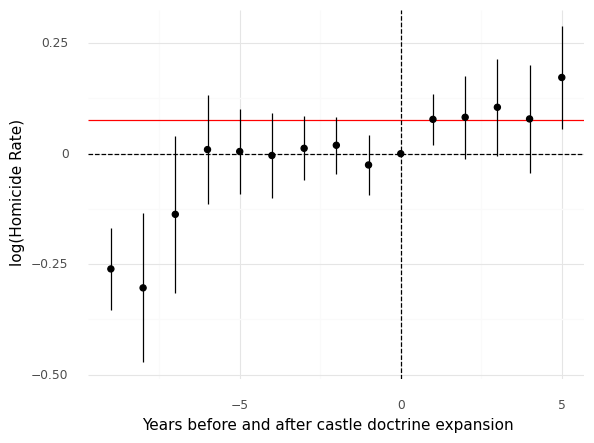

<ggplot: (8783900164756)>

In [ ]:
# 
leads = ['lead9[T.True]', 'lead8[T.True]', 'lead7[T.True]', 'lead6[T.True]', 'lead5[T.True]', 'lead4[T.True]', 'lead3[T.True]', 'lead2[T.True]', 'lead1[T.True]']
lags = ['lag1[T.True]', 'lag2[T.True]', 'lag3[T.True]', 'lag4[T.True]', 'lag5[T.True]']

leadslags_plot = pd.DataFrame({
    'sd' : np.concatenate([np.sqrt(np.diag(event_study_formula.cov_params().loc[leads][leads])), np.array([0]), np.sqrt(np.diag(event_study_formula.cov_params().loc[lags][lags]))]),
    'mean':  np.concatenate([event_study_formula.params[leads], np.array([0]), event_study_formula.params[lags]]),
    'label': np.arange(-9, 6)}) 

leadslags_plot['lb'] = leadslags_plot['mean'] - leadslags_plot['sd']*1.96
leadslags_plot['ub'] = leadslags_plot['mean'] + leadslags_plot['sd']*1.96

# This version has a point-range at each estimated lead or lag
# comes down to stylistic preference at the end of the day!
p.ggplot(leadslags_plot, p.aes(x = 'label', y = 'mean',
             ymin = 'lb', 
             ymax = 'ub')) +\
    p.geom_hline(yintercept = 0.0769, color = "red") +\
    p.geom_pointrange() +\
    p.theme_minimal() +\
    p.xlab("Years before and after castle doctrine expansion") +\
    p.ylab("log(Homicide Rate)") +\
    p.geom_hline(yintercept = 0,
             linetype = "dashed") +\
    p.geom_vline(xintercept = 0,
             linetype = "dashed")

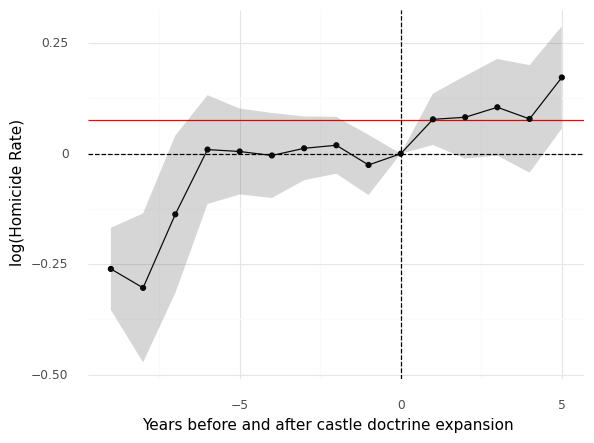

<ggplot: (8783900190136)>

In [ ]:
# This version has a point-range at each estimated lead or lag
# comes down to stylistic preference at the end of the day!
p.ggplot(leadslags_plot, p.aes(x = 'label', y = 'mean',
             ymin = 'lb', 
             ymax = 'ub')) +\
    p.geom_hline(yintercept = 0.0769, color = "red") +\
    p.geom_line() +\
    p.geom_point() +\
    p.geom_ribbon(alpha = 0.2) +\
    p.theme_minimal() +\
    p.xlab("Years before and after castle doctrine expansion") +\
    p.ylab("log(Homicide Rate)") +\
    p.geom_hline(yintercept = 0,
             linetype = "dashed") +\
    p.geom_vline(xintercept = 0,
             linetype = "dashed")